# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# To display complete pandas dataframe without truncating

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


# Read csv and remove first column

In [3]:
laptop = pd.read_csv('dataset/completelaptopdata.csv', encoding= 'unicode_escape')

In [4]:
laptop = laptop.iloc[:,1:]

# First Look on dataset

In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 97 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   link                               984 non-null    object 
 1   name                               984 non-null    object 
 2   user rating                        690 non-null    float64
 3   Price                              984 non-null    object 
 4   Sales Package                      984 non-null    object 
 5   Model Number                       984 non-null    object 
 6   Part Number                        984 non-null    object 
 7   Model Name                         709 non-null    object 
 8   Series                             787 non-null    object 
 9   Color                              984 non-null    object 
 10  Type                               984 non-null    object 
 11  Suitable For                       984 non-null    object 

In [6]:
laptop.describe()

,user rating,Number of Cores,RPM
count,690.000000,724.000000,93.000000
mean,4.206232,4.736188,5308.408602
std,0.446992,2.574643,1149.299770
min,1.800000,1.000000,4.000000
25%,4.000000,2.000000,5400.000000
50%,4.300000,4.000000,5400.000000
75%,4.500000,6.000000,5400.000000
max,5.000000,14.000000,7200.000000


# Check no. of features that have null values in their rows

In [7]:
count = 0
for columns in laptop.columns:
    if laptop[columns].isnull().sum()>0:
        count+=1
print(f'Total {count} features have null values out of {len(laptop.columns)}')

Total 74 features have null values out of 97


# heatmap to check null values

<AxesSubplot:>

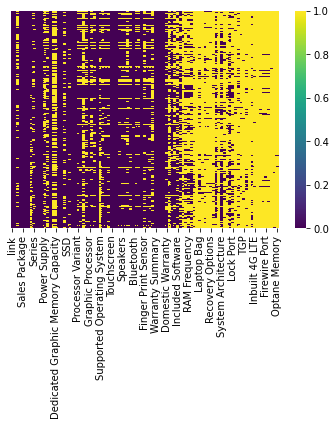

In [8]:
sns.heatmap(laptop.isnull(),yticklabels=False, cmap='viridis')

# extract company from name. description in name are already in other features

In [9]:
laptop['name'].unique()
laptop_list = ['ASUS','Lenovo','DELL','HP','acer','MSI','LG','realme','Avita','SAMSUNG','Infinix','Nokia','RedmiBook','APPLE','Mi','Vaio']
def extract_company(x):
    for i in laptop_list:
        if i.capitalize() in x.capitalize():
            return i
laptop['company'] = laptop['name'].apply(extract_company)

# combine series and model name if series is null since they are same

In [10]:
laptop["Series"] = laptop["Series"].fillna(laptop["Model Name"])

# categorise laptop suitability

In [11]:
def categorise_laptop_suitablity(x):
    
    if 'Gaming' in x:
        return 1
    elif'Everyday Use' in x or 'Entertainment' in x:
        return 2
    else:
        return 3
laptop['Suitable_cat'] = laptop['Suitable For'].apply(categorise_laptop_suitablity)
laptop['Suitable_cat'].unique()
laptop[laptop['Suitable_cat']==3]['Suitable For'].unique()

array(['Processing & Multitasking', 'Travel & Business', 'Performance',
       'Processing & Multitasking, Travel & Business',
       'Performance, Processing & Multitasking, Travel & Business'],
      dtype=object)

# weight string to int

In [12]:
laptop['Weight'] = laptop['Weight'].str.extract('(\d+.\d+)').astype(float)

# extract price from string

In [13]:

laptop['Price'] = laptop['Price'].replace(',','', regex=True)
laptop['Price'] = laptop['Price'].str.extract('(\d+)').astype(float)

# drop rows with user rating as null

In [14]:
laptop = laptop.dropna(axis=0, subset=['user rating']) 

# convert user rating from float to int and consider only approx value

In [15]:
laptop['user rating'] = laptop['user rating'].astype(int)

In [16]:
laptop['Price'].nlargest(20)

735    239990.0
0      234990.0
72     234990.0
507    225990.0
676    179990.0
941    159990.0
732    158490.0
563    157990.0
556    154990.0
678    154990.0
932    154990.0
965    150490.0
725    149990.0
662    147990.0
554    142990.0
977    142990.0
717    141990.0
280    140990.0
267    139990.0
633    139990.0
Name: Price, dtype: float64

# laptop with price above the mean price of all laptops

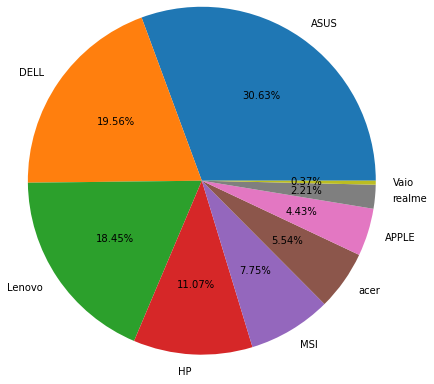

In [17]:
high_priced = laptop[laptop['Price']>laptop['Price'].mean()][['company','Price']]
company_names = high_priced['company'].value_counts().index
company_val = high_priced['company'].value_counts().values
plt.pie(company_val,labels=company_names,radius=2, autopct='%1.2f%%')
plt.show()

# high user rating

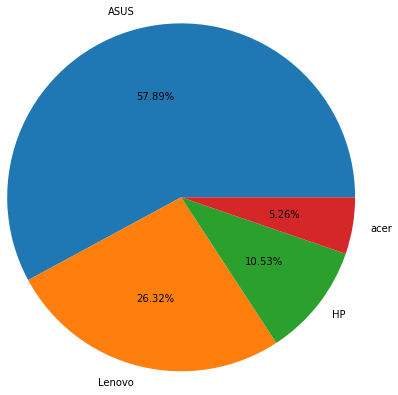

In [18]:
high_rated = laptop[laptop['user rating']==5.0]
company_names = high_rated['company'].value_counts().index
company_val = high_rated['company'].value_counts().values
plt.pie(company_val,labels=company_names, radius=2, autopct='%1.2f%%')
plt.show()

Conclusion


More than 50% of 5 stared user rating are for ASUS in data

In [19]:
ratingdf = laptop.groupby(['user rating','company']).size().reset_index().rename(columns={0: 'Rating count'})

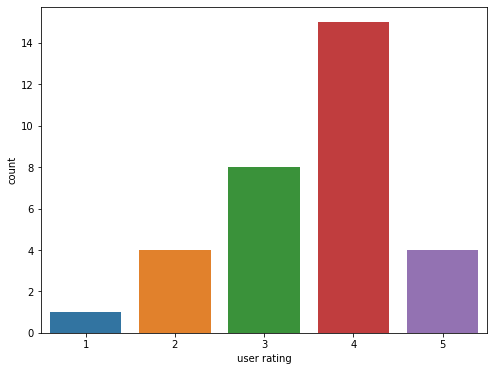

In [20]:
matplotlib.rcParams['figure.figsize']=(8,6)
sns.countplot(x='user rating', data=ratingdf)
plt.show()

Conclusion

Max rating of laptops are 4

In [21]:
#max colour options
laptop_colors = laptop.groupby(['company','Color']).size().reset_index()

In [22]:
max_ = 0
for company in laptop_colors['company'].unique():
    color_options = len(laptop[laptop['company']==company]['Color'].unique())
    if max_ < color_options:
        max_ =color_options
        max_company=company
print(f'{max_company} offers higest colors with {max_} options')

ASUS offers higest colors with 33 options


In [23]:
laptop_type = laptop.groupby(['company','Type','Price','user rating']).size().reset_index()

In [24]:
laptop['Type'].unique()

array(['Gaming Laptop', 'Thin and Light Laptop', 'Notebook', 'Laptop',
       '2 in 1 Laptop', 'Business Laptop', 'Creator Laptop', 'Chromebook',
       '2 in 1 Gaming Laptop'], dtype=object)

In [25]:
laptop_type[laptop_type['Type']=='Gaming Laptop']['company'].unique()

array(['ASUS', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'], dtype=object)

In [26]:
gaming_laptop = laptop_type[laptop_type['Type']=='Gaming Laptop']

Conclusion

6 companies have their own gaming laptop and ACER is the costliest among them

Price for Apple's thin and light laptop is extremely high

MSI Notebook's are costlier

ASUS, Dell and HP have buisness laptops

ASUS have Creator laptops and 2 in 1 gaming laptop 

Lenova Chromebook's are costlier

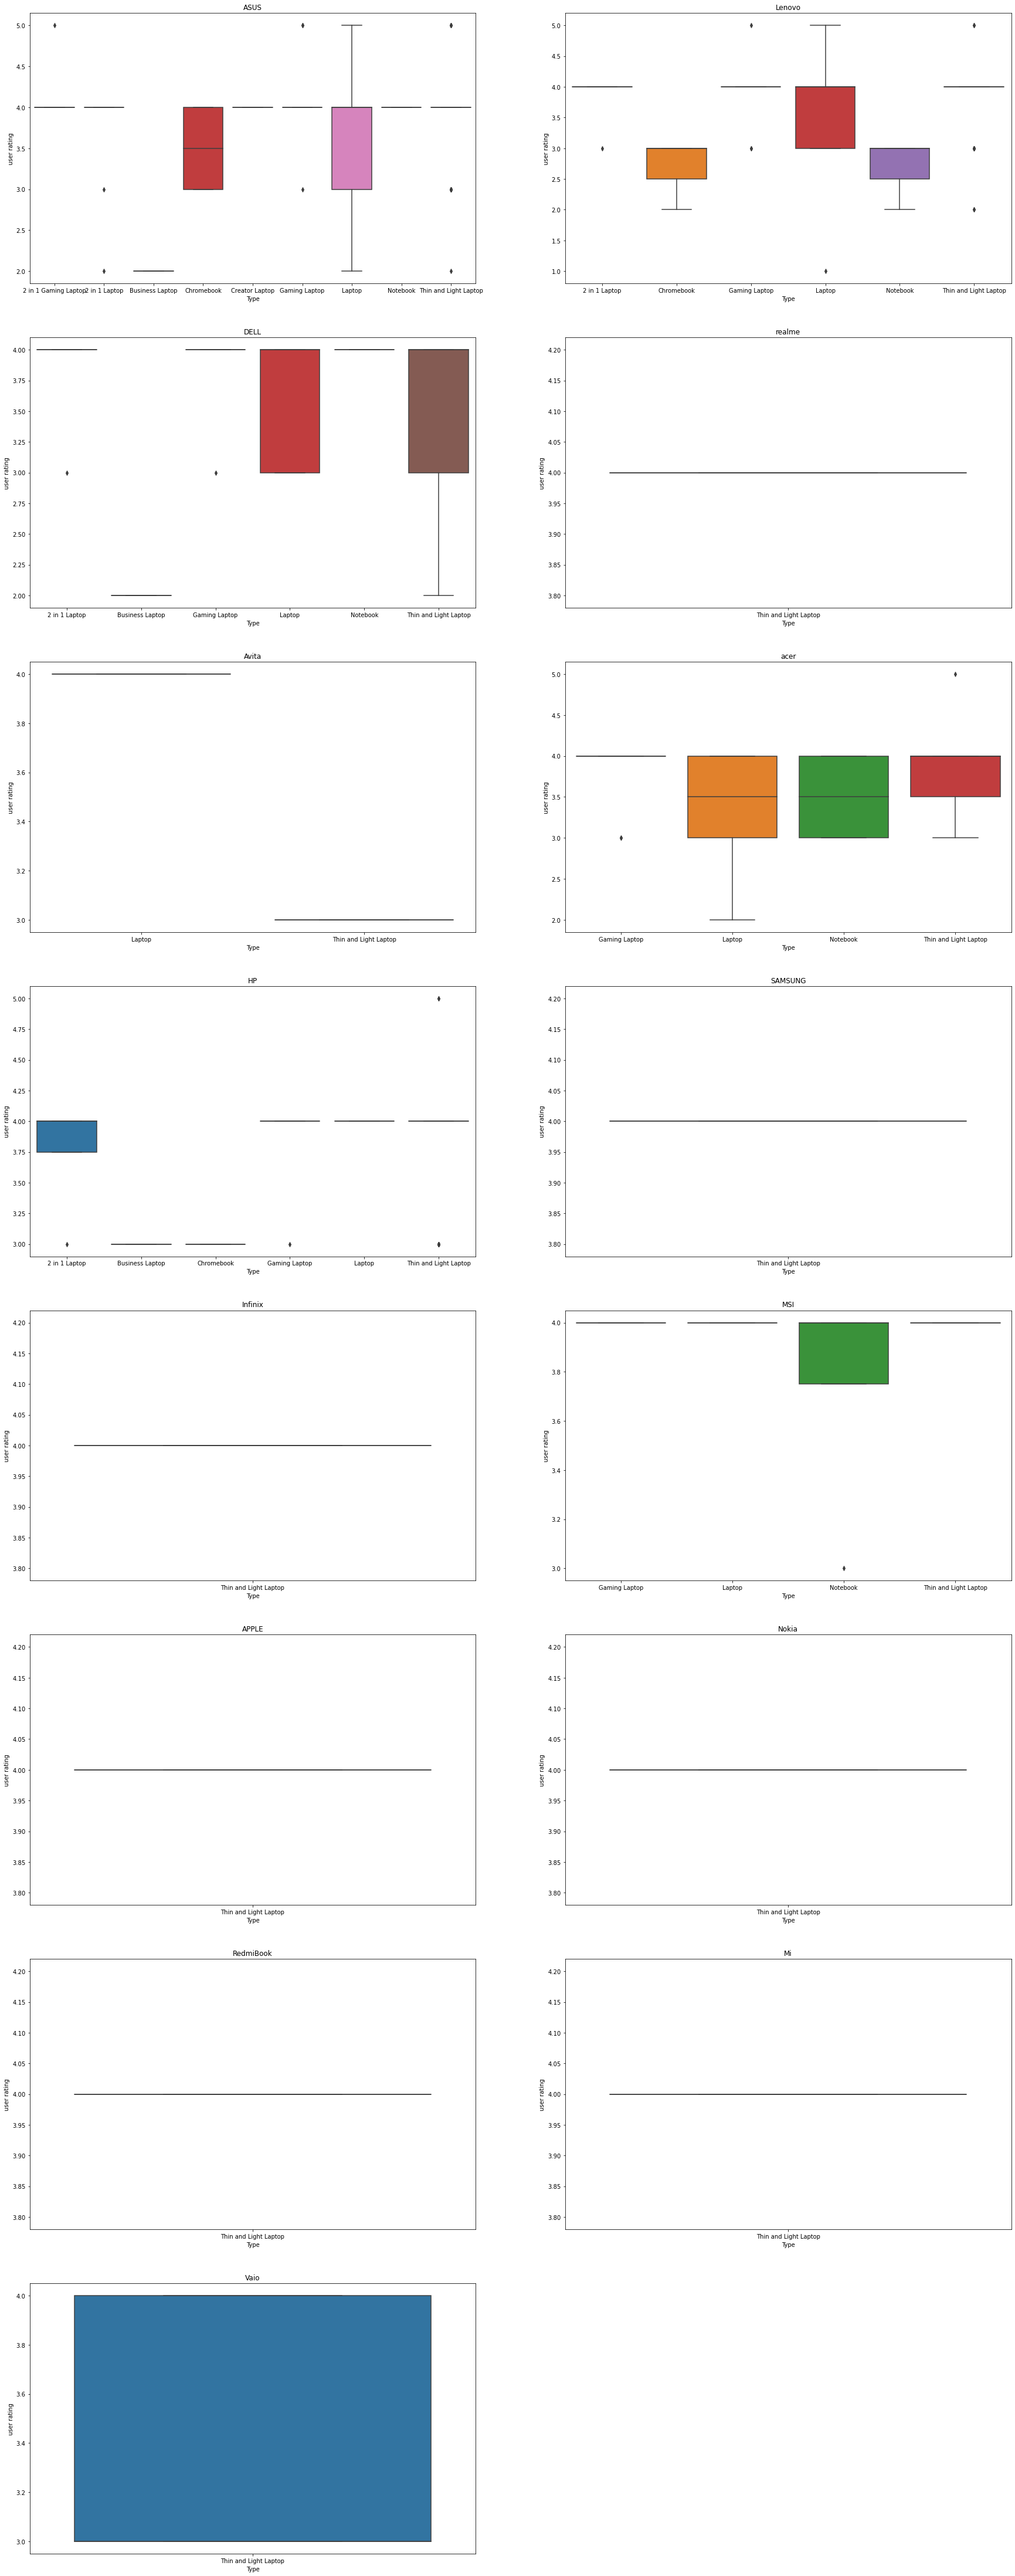

In [27]:
#laptoptype vs Price for each company
count=1
plt.subplots(figsize=(30, 100))
for type_ in laptop['company'].unique():
    ax = plt.subplot(10,2,count)
    ax.title.set_text(type_)
    laptop_ = laptop_type[laptop_type['company']==type_]
    sns.boxplot(x='Type', y='user rating',data=laptop_)
    count +=1

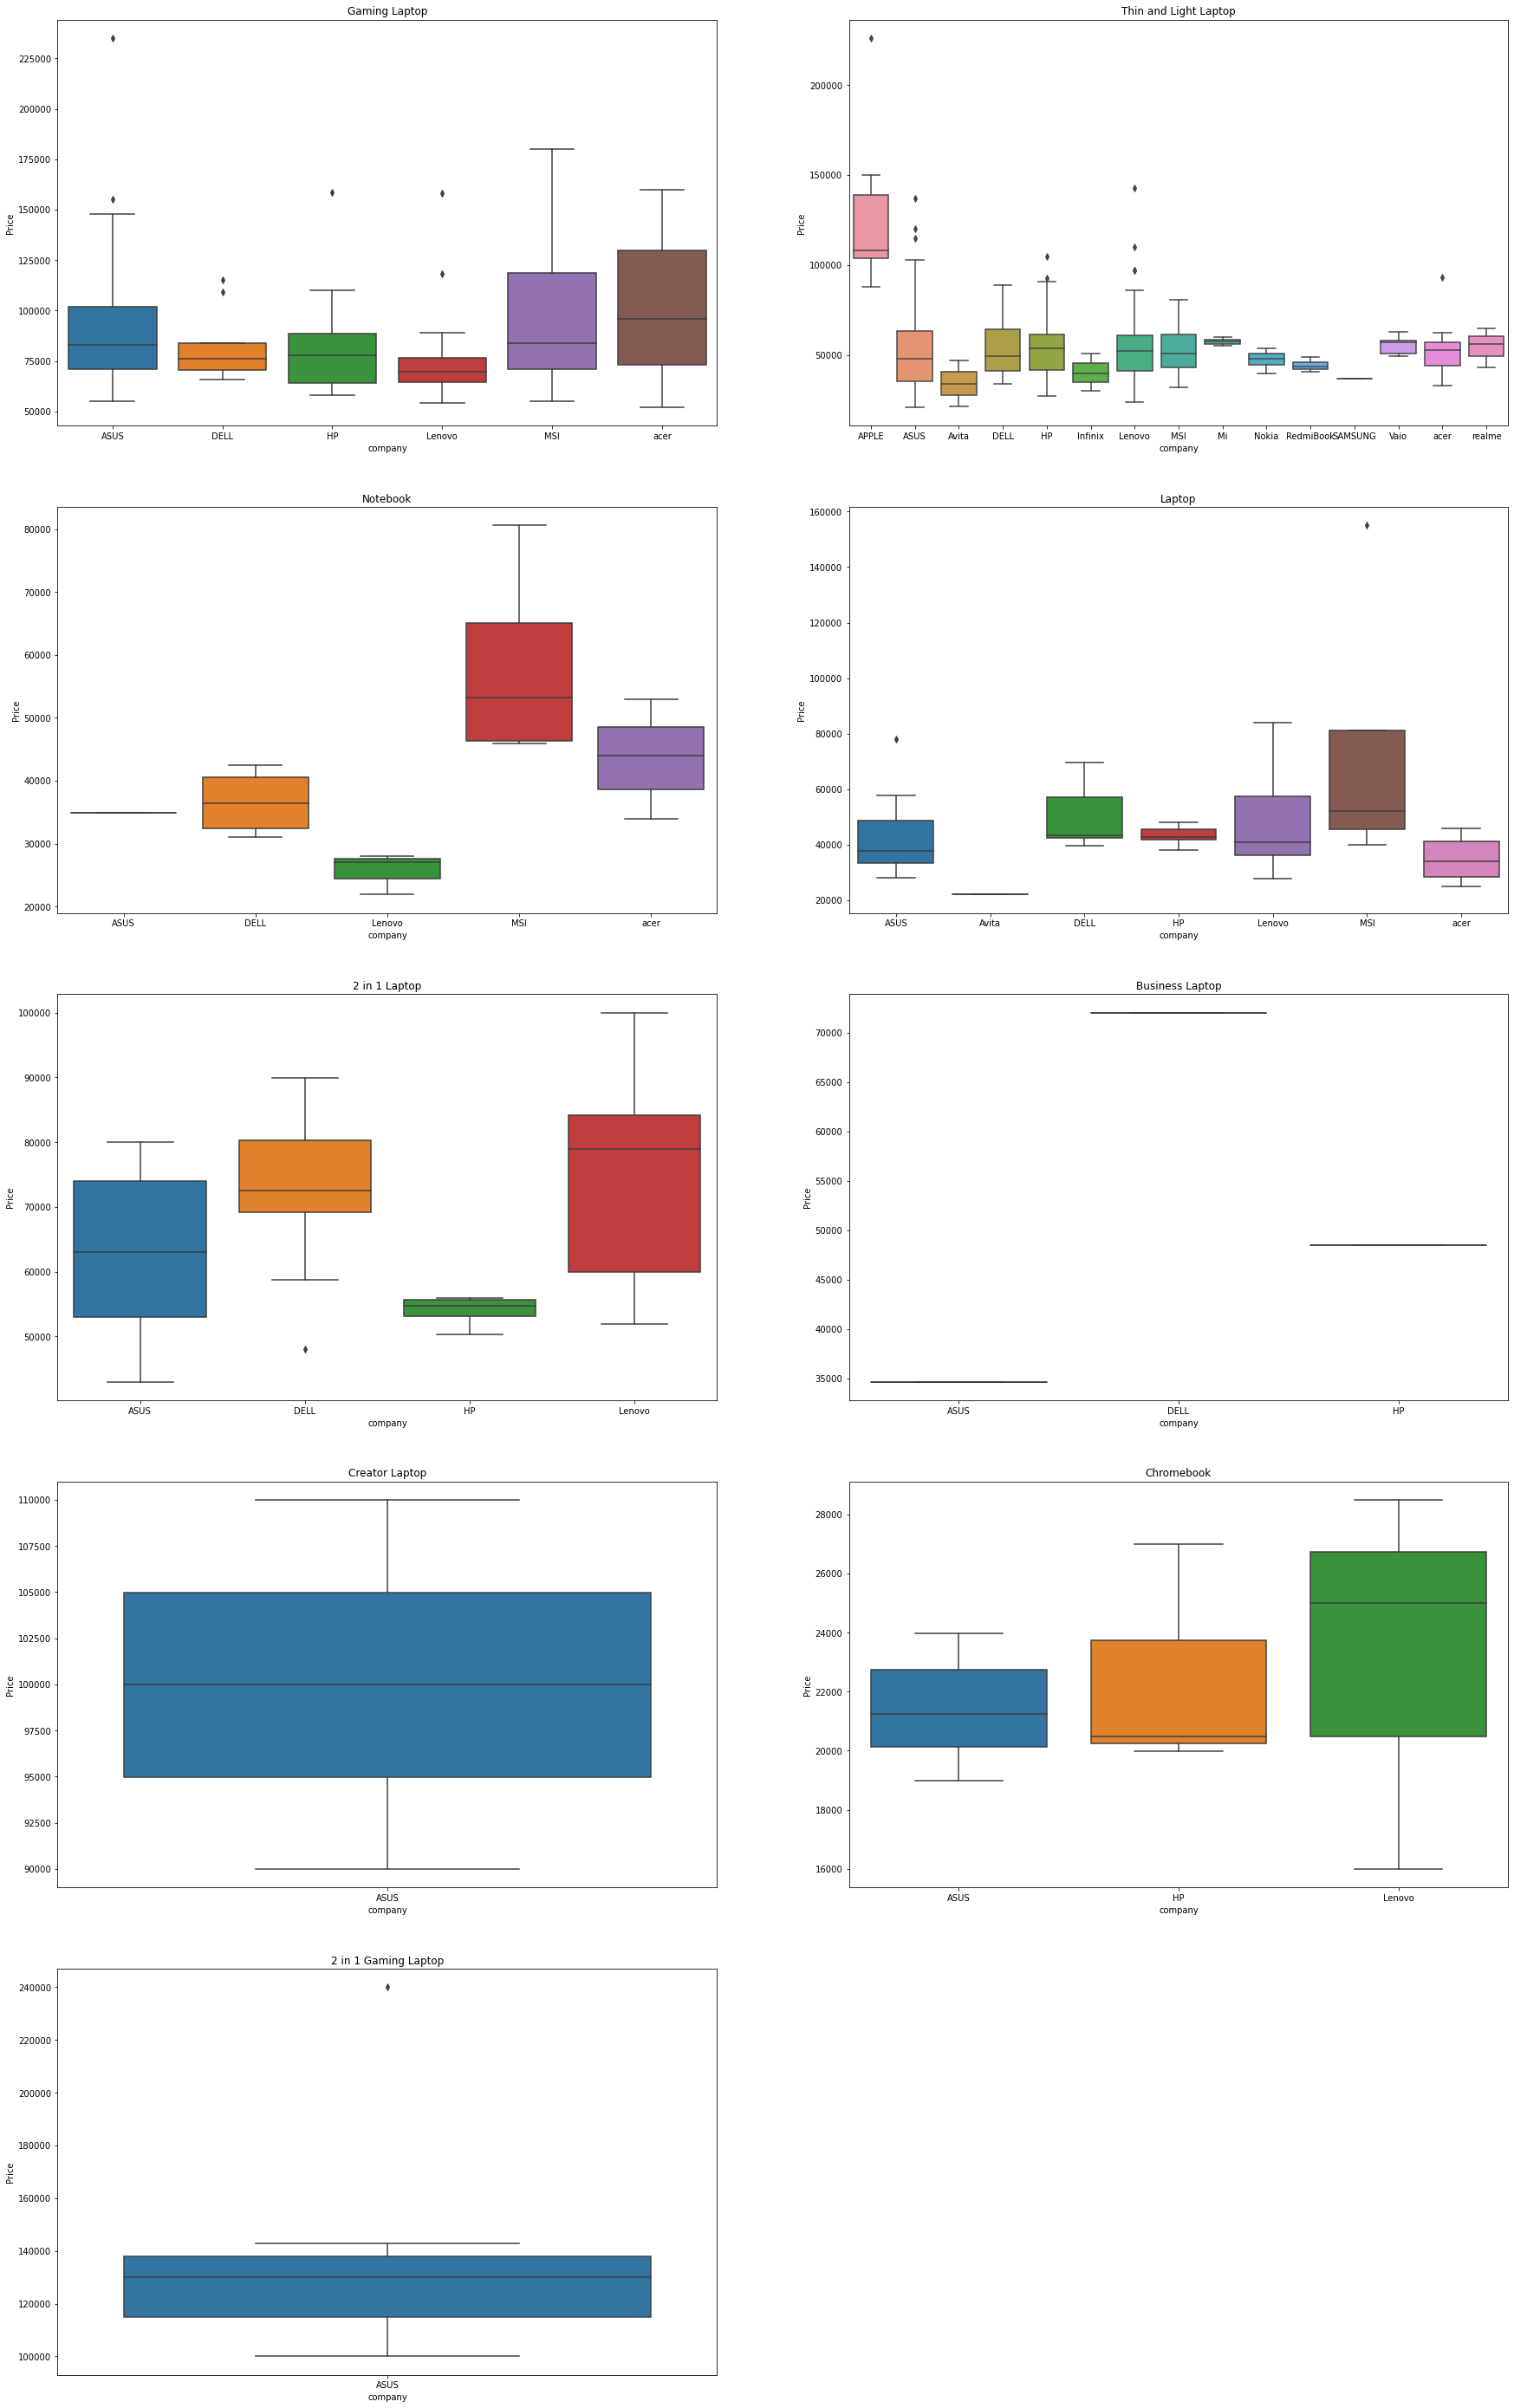

In [28]:
count=1
plt.subplots(figsize=(30, 50))
for type_ in laptop['Type'].unique():
    ax = plt.subplot(5,2,count)
    ax.title.set_text(type_)
    laptop_ = laptop_type[laptop_type['Type']==type_]
    sns.boxplot(x='company', y='Price',data=laptop_)
    count +=1